<a href="https://colab.research.google.com/github/hemantsinghrajput/-Exploratory-Data-Analysis-AMEO-Data-/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the datasets
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')


In [5]:
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
merged_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [8]:
missing_values = merged_data.isnull().sum()
missing_values
# column_with_most_missing_values = missing_values.idxmax()
# column_with_most_missing_values

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [9]:
city_with_most_seasons = matches['city'].value_counts().idxmax()
city_with_most_seasons

'Mumbai'

In [10]:
matches['year'] = pd.to_datetime(matches['date']).dt.year
year_with_most_matches = matches['year'].value_counts().idxmax()
year_with_most_matches

2013

In [12]:
mumbai_wins_2011 = matches[(matches['team1'] == 'Mumbai Indians') | (matches['team2'] == 'Mumbai Indians')]
mumbai_wins_2011 = mumbai_wins_2011[mumbai_wins_2011['year'] == 2011]
max_wins_mumbai_2011 = mumbai_wins_2011['winner'].value_counts()
max_wins_mumbai_2011

Mumbai Indians                 10
Rajasthan Royals                2
Kochi Tuskers Kerala            1
Kings XI Punjab                 1
Deccan Chargers                 1
Royal Challengers Bangalore     1
Name: winner, dtype: int64

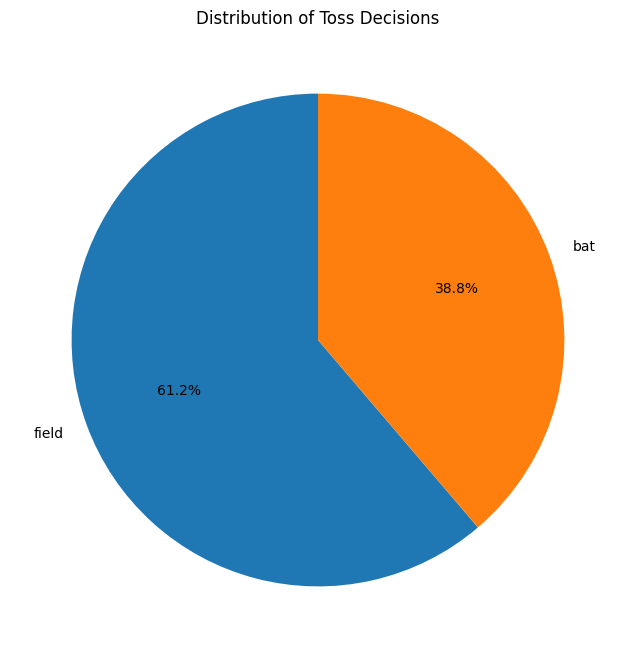

In [13]:
import matplotlib.pyplot as plt

# Count the frequency of each toss decision
toss_decision_counts = matches['toss_decision'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Toss Decisions')
plt.show()


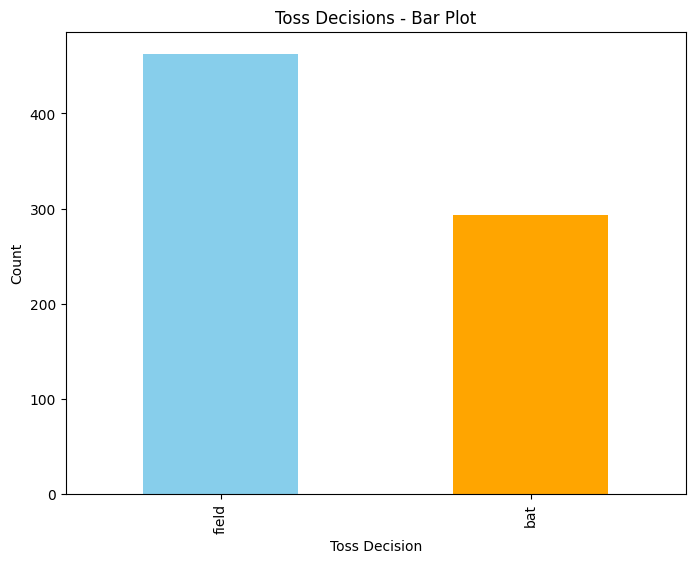

In [14]:
import matplotlib.pyplot as plt

# Count the frequency of each toss decision
toss_decision_counts = matches['toss_decision'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
toss_decision_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Toss Decisions - Bar Plot')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()


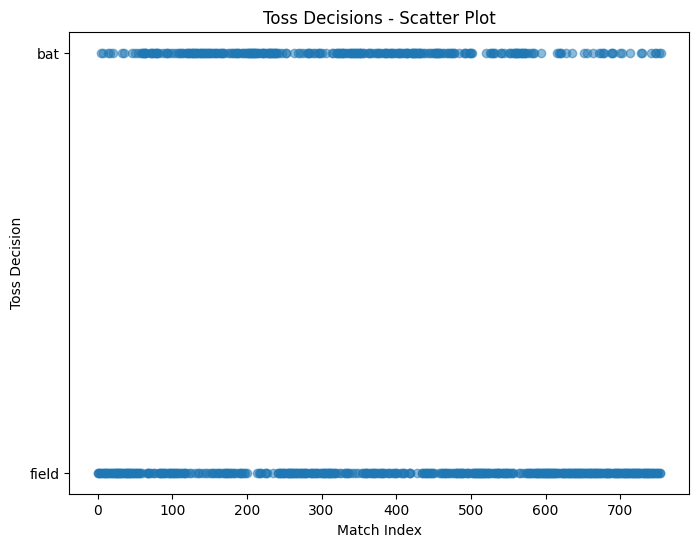

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(matches)), matches['toss_decision'], alpha=0.5)
plt.title('Toss Decisions - Scatter Plot')
plt.xlabel('Match Index')
plt.ylabel('Toss Decision')
plt.show()


In [17]:
# Calculate the percentage
toss_decision_percentage = matches['toss_decision'].value_counts(normalize=True) * 100

# Print the result
print(f"{toss_decision_percentage['bat']:.1f}%, {toss_decision_percentage['field']:.1f}%")


38.8%, 61.2%


In [18]:
# Create a DataFrame with matches where the team won the toss and elected to field first
field_first_wins = matches[(matches['toss_winner'] == matches['winner']) & (matches['toss_decision'] == 'field')]

# Create a DataFrame with matches where the team won the toss and elected to bat first
bat_first_wins = matches[(matches['toss_winner'] == matches['winner']) & (matches['toss_decision'] == 'bat')]

# Check which statement holds true
if len(field_first_wins) > len(bat_first_wins):
    result = "Teams winning tosses and electing field first have won more number of matches."
elif len(field_first_wins) < len(bat_first_wins):
    result = "Teams winning tosses and electing bat first have won more number of matches."
else:
    result = "Both A and B"

# Print the result
print(result)


Teams winning tosses and electing field first have won more number of matches.


In [22]:
# Create a DataFrame with matches where the team batting second won
batting_second_wins = matches[matches['win_by_wickets'] > 0]

# Count the number of wins for each year
yearly_wins = batting_second_wins['season'].value_counts()
print(yearly_wins)
# Find the years where batting second has won more matches
max_wins = yearly_wins.max()
years_with_max_wins = yearly_wins[yearly_wins == max_wins].index.tolist()

# Print the result
print("In which years where taking batting second have won more number of matches?")
print("Options:")
for year in years_with_max_wins:
    print(f"{year}")


2012    40
2011    39
2016    39
2013    37
2014    37
2019    35
2008    34
2017    32
2018    32
2009    29
2010    28
2015    24
Name: season, dtype: int64
In which years where taking batting second have won more number of matches?
Options:
2012


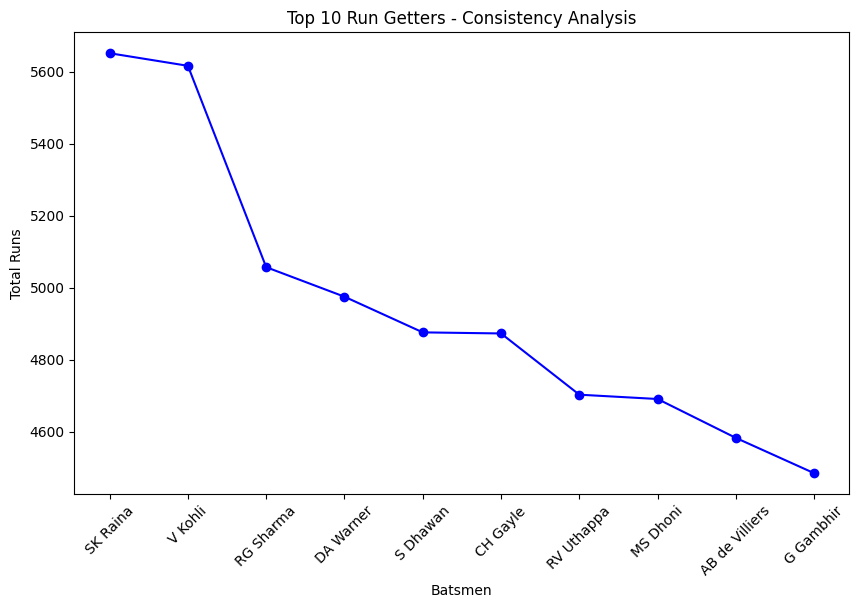

In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'top_10_run_getters' with columns 'batsman' and 'total_runs'
# Replace it with your actual DataFrame and column names
batsman_total_runs = deliveries.groupby('batsman')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
top_10_run_getters = batsman_total_runs.sort_values(by='total_runs', ascending=False).head(10)

# Sort the DataFrame by total runs in descending order
top_10_run_getters = top_10_run_getters.sort_values(by='total_runs', ascending=False).head(10)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_run_getters['batsman'], top_10_run_getters['total_runs'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Getters - Consistency Analysis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [24]:
import pandas as pd

# Assuming 'deliveries' DataFrame is available with columns 'batsman' and 'total_runs'
# Replace it with your actual DataFrame and column names

# Calculate total runs for each batsman
batsman_total_runs = deliveries.groupby('batsman')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
top_10_run_getters = batsman_total_runs.sort_values(by='total_runs', ascending=False).head(10)

# Display the top 10 batsmen by total runs
print(top_10_run_getters)


            batsman  total_runs
428        SK Raina        5651
486         V Kohli        5616
367       RG Sharma        5057
112       DA Warner        4975
392        S Dhawan        4876
92         CH Gayle        4873
384      RV Uthappa        4703
290        MS Dhoni        4691
26   AB de Villiers        4583
147       G Gambhir        4485


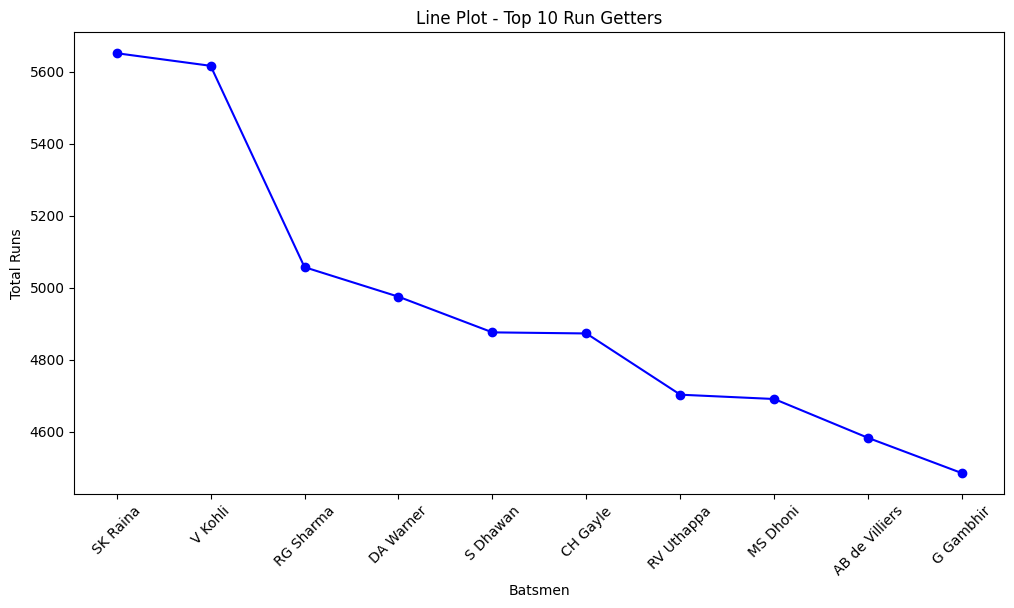

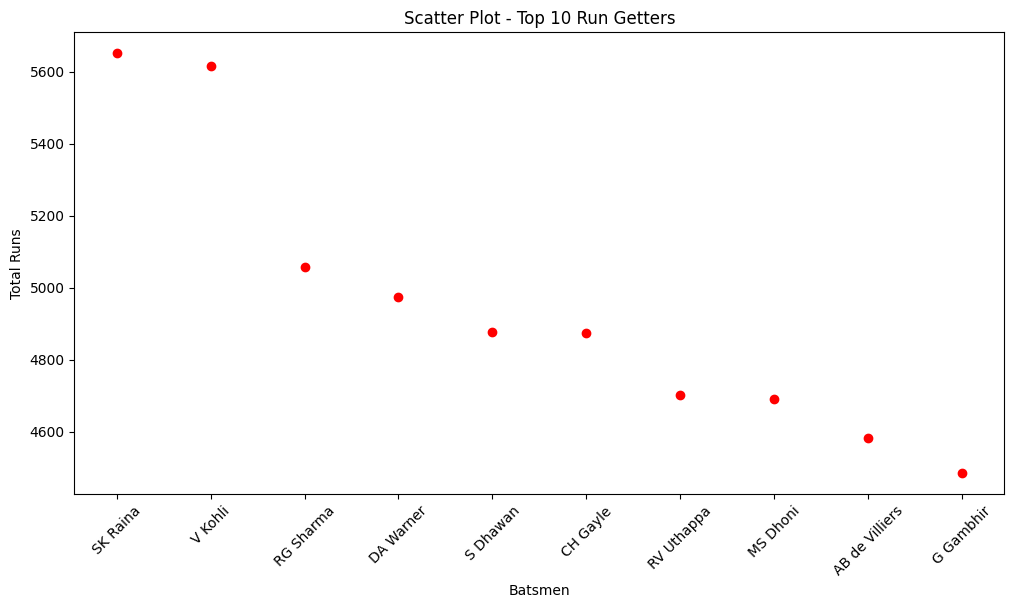

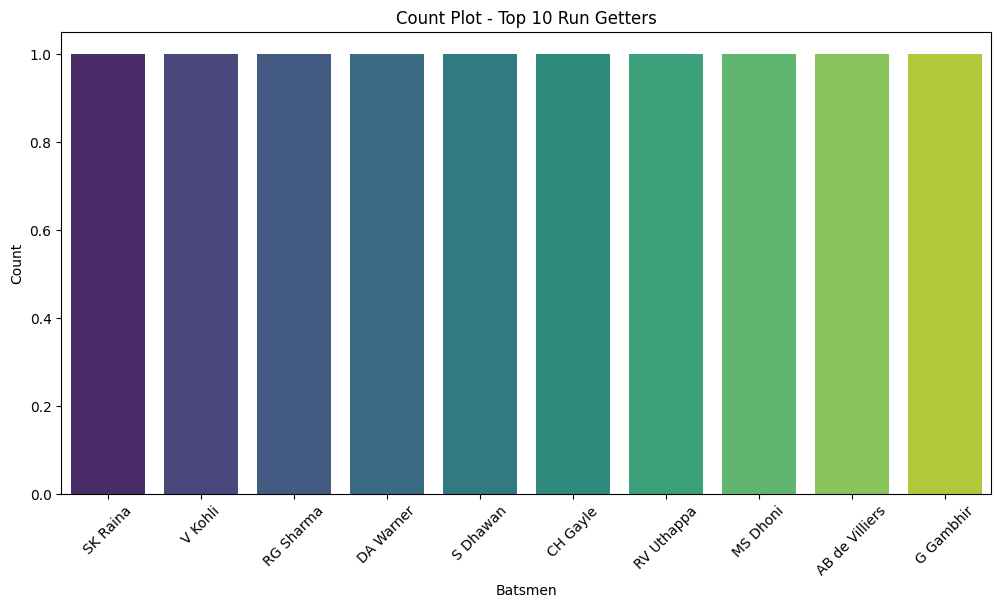

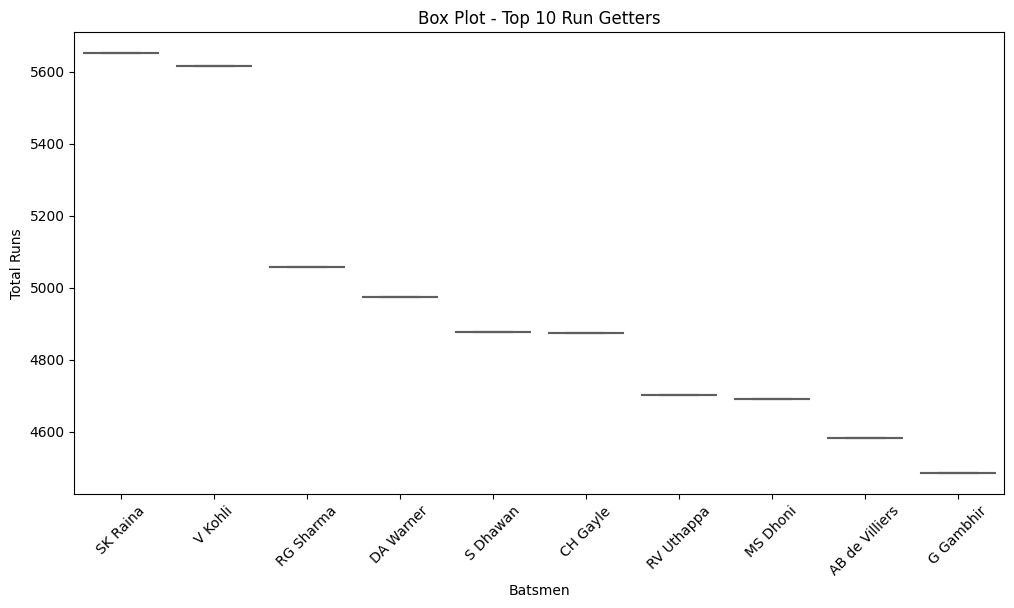

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_10_run_getters' DataFrame is available with columns 'batsman' and 'total_runs'
# Replace it with your actual DataFrame and column names

# Sort the DataFrame by total runs in descending order
top_10_run_getters = top_10_run_getters.sort_values(by='total_runs', ascending=False).head(10)

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(top_10_run_getters['batsman'], top_10_run_getters['total_runs'], marker='o', linestyle='-', color='b')
plt.title('Line Plot - Top 10 Run Getters')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(top_10_run_getters['batsman'], top_10_run_getters['total_runs'], color='r')
plt.title('Scatter Plot - Top 10 Run Getters')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='batsman', data=top_10_run_getters, palette='viridis')
plt.title('Count Plot - Top 10 Run Getters')
plt.xlabel('Batsmen')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='batsman', y='total_runs', data=top_10_run_getters, palette='Set3')
plt.title('Box Plot - Top 10 Run Getters')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'total_runs', and 'season'
# Replace it with your actual DataFrame and column names

# Filter the data for the year 2019
deliveries_2019 = merged_data[merged_data['season'] == 2019]

# Calculate the total runs scored by each batsman from 6's and 4's
batsman_runs_6_4 = deliveries_2019.groupby('batsman')['total_runs'].sum().reset_index()

# Sort the DataFrame by total runs in descending order
highest_scorer_6_4 = batsman_runs_6_4.sort_values(by='total_runs', ascending=False).head(1)

# Print the batsman who scored the highest number of runs by hitting 6's and 4's in 2019
print(highest_scorer_6_4['batsman'].values[0])


DA Warner


In [29]:
# Assuming you have a DataFrame named 'deliveries' with columns 'bowler', 'dismissal_kind', and 'player_dismissed'
# Replace it with your actual DataFrame and column names

# Filter the data for dismissals
dismissals = merged_data[merged_data['dismissal_kind'].notna()]

# Group by bowler and count the number of dismissals
wickets_count = dismissals.groupby('bowler')['dismissal_kind'].count().reset_index()

# Sort the DataFrame by wickets count in descending order
most_wickets_bowler = wickets_count.sort_values(by='dismissal_kind', ascending=False).head(1)

# Print the bowler who took the most number of wickets
print(most_wickets_bowler['bowler'].values[0])


SL Malinga


In [34]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'total_runs', and 'ball'
# Replace it with your actual DataFrame and column names

# Filter the data for Kohli in 2016
kohli_2016 = merged_data[(merged_data['batsman'] == 'V Kohli') & (merged_data['date'].str.contains('2016'))]

# Calculate the total runs and total balls faced by Kohli in 2016
total_runs = kohli_2016['batsman_runs'].sum()
total_balls = kohli_2016['ball'].sum()

# Calculate the strike rate
strike_rate = (total_runs / total_balls) * 100

# Print the strike rate
print(strike_rate)


43.34075723830735


In [35]:
# Assuming you have a DataFrame named 'deliveries' with columns 'bowler' and 'extra_runs'
# Replace it with your actual DataFrame and column names

# Group by bowler and calculate the sum of extra runs for each bowler
extras_by_bowler = merged_data.groupby('bowler')['extra_runs'].sum().reset_index()

# Find the bowler with the maximum number of extras
max_extras_bowler = extras_by_bowler.loc[extras_by_bowler['extra_runs'].idxmax()]

# Print the bowler's name and the number of extras
print("Bowler with Maximum Extras:", max_extras_bowler['bowler'])
print("Number of Extras:", max_extras_bowler['extra_runs'])


Bowler with Maximum Extras: SL Malinga
Number of Extras: 293


In [36]:
# Assuming you have a DataFrame named 'matches' with the column 'venue'
# Replace it with your actual DataFrame and column names

# Count the number of matches at each venue
venue_counts = matches['venue'].value_counts()

# Find the venue with the maximum number of matches
max_matches_venue = venue_counts.idxmax()

# Print the venue name and the number of matches hosted
print("Venue with Most Matches Hosted:", max_matches_venue)
print("Number of Matches Hosted:", venue_counts[max_matches_venue])


Venue with Most Matches Hosted: Eden Gardens
Number of Matches Hosted: 77


In [37]:
# Assuming you have a DataFrame named 'matches' with columns 'season', 'team1', 'team2', and 'player_of_match'
# Replace it with your actual DataFrame and column names

# Filter matches for the specified conditions in 2017 when Sunrisers Hyderabad clashed against Royal Challengers Bangalore
specific_match = matches[(matches['season'] == 2017) &
                         (((matches['team1'] == 'Sunrisers Hyderabad') & (matches['team2'] == 'Royal Challengers Bangalore')) |
                          ((matches['team1'] == 'Royal Challengers Bangalore') & (matches['team2'] == 'Sunrisers Hyderabad')))]

# Get the player of the match for that specific match
player_of_match = specific_match['player_of_match'].iloc[0]

# Print the player of the match
print("Player of the Match:", player_of_match)


Player of the Match: Yuvraj Singh


In [40]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'dismissal_kind', and 'fielder'
# Replace it with your actual DataFrame and column names

# Filter deliveries for run-out dismissals
run_outs = merged_data[merged_data['dismissal_kind'] == 'run out']

# Count the number of run-outs for each batsman
run_out_counts = run_outs['batsman'].value_counts()
print(run_out_counts)
# Get the top three batsmen with the most number of run-outs
top_three_run_out_batsmen = run_out_counts.head(4)

# Print the top three batsmen with the most number of run-outs
print("Top Three Batsmen with Most Run-Outs:")
print(top_three_run_out_batsmen)


MS Dhoni       21
RG Sharma      17
KD Karthik     16
G Gambhir      15
V Kohli        15
               ..
RR Bhatkal      1
T Kohli         1
PC Valthaty     1
SP Fleming      1
J Suchith       1
Name: batsman, Length: 277, dtype: int64
Top Three Batsmen with Most Run-Outs:
MS Dhoni      21
RG Sharma     17
KD Karthik    16
G Gambhir     15
Name: batsman, dtype: int64


In [41]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'bowler', and 'total_runs'
# Replace it with your actual DataFrame and column names

# Filter deliveries for rows where the batsman is V Kohli and the bowler is JJ Bumrah
kohli_vs_bumrah = deliveries[(deliveries['batsman'] == 'V Kohli') & (deliveries['bowler'] == 'JJ Bumrah')]

# Calculate the total runs scored by V Kohli against JJ Bumrah
total_runs_kohli_vs_bumrah = kohli_vs_bumrah['total_runs'].sum()

# Print the total runs scored by V Kohli against JJ Bumrah
print("Total Runs scored by V Kohli against JJ Bumrah:", total_runs_kohli_vs_bumrah)


Total Runs scored by V Kohli against JJ Bumrah: 114


In [42]:
# Assuming you have a DataFrame named 'deliveries' with columns 'player_dismissed' and 'dismissal_kind'
# Replace it with your actual DataFrame and column names

# Filter deliveries for caught and bowled dismissals
caught_and_bowled = deliveries[deliveries['dismissal_kind'] == 'caught and bowled']

# Find the player dismissed the maximum number of times via caught and bowled
max_dismissed_player = caught_and_bowled['player_dismissed'].value_counts().idxmax()

# Find the number of times the player was dismissed via caught and bowled
max_dismissed_count = caught_and_bowled[caught_and_bowled['player_dismissed'] == max_dismissed_player].shape[0]

# Print the result
print("Player dismissed the maximum number of times via caught and bowled:", max_dismissed_player)
print("Number of times:", max_dismissed_count)


Player dismissed the maximum number of times via caught and bowled: SK Raina
Number of times: 7


In [51]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'batsman_runs', and 'ball'
# Replace it with your actual DataFrame and column names

# Calculate strike rates for each batsman
strike_rates = merged_data.groupby('batsman')['batsman_runs'].sum() / merged_data.groupby('batsman')['ball'].count() * 100

# Sort batsmen by strike rate in descending order and get the top 10
top_10_strike_rates = strike_rates.sort_values(ascending=False).head(20)

# Print the result
print("Top 10 players with the best strike rates:")
print(top_10_strike_rates)


Top 10 players with the best strike rates:
batsman
B Stanlake         250.000000
Umar Gul           205.263158
RS Sodhi           200.000000
S Sharma           200.000000
AD Russell         179.950187
Shahid Afridi      176.086957
I Malhotra         175.000000
S Curran           172.727273
K Gowtham          172.093023
SN Thakur          171.428571
M Ali              169.945355
LJ Wright          168.253968
SP Narine          166.943867
Shivam Sharma      166.666667
KMDN Kulasekara    166.666667
KK Cooper          165.714286
BCJ Cutting        164.383562
Kamran Akmal       164.102564
BJ Haddin          163.636364
Rashid Khan        162.686567
dtype: float64


In [56]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'batsman_runs', and 'ball'
# Replace it with your actual DataFrame and column names

# Calculate strike rates for each batsman
strike_rates = merged_data.groupby('batsman')['batsman_runs'].sum() / merged_data.groupby('batsman')['ball'].count() * 100

# Sort batsmen by strike rate in descending order and get the top 10
top_10_strike_rates = strike_rates.sort_values(ascending=False).head(30)
top_10_strike_rates


batsman
B Stanlake         250.000000
Umar Gul           205.263158
RS Sodhi           200.000000
S Sharma           200.000000
AD Russell         179.950187
Shahid Afridi      176.086957
I Malhotra         175.000000
S Curran           172.727273
K Gowtham          172.093023
SN Thakur          171.428571
M Ali              169.945355
LJ Wright          168.253968
SP Narine          166.943867
Shivam Sharma      166.666667
KMDN Kulasekara    166.666667
KK Cooper          165.714286
BCJ Cutting        164.383562
Kamran Akmal       164.102564
BJ Haddin          163.636364
Rashid Khan        162.686567
KJ Abbott          162.500000
RR Pant            162.318841
N Pooran           160.909091
ER Dwivedi         160.000000
J Bairstow         159.726962
DL Chahar          158.695652
H Brar             157.142857
CR Brathwaite      156.666667
GJ Maxwell         155.543237
Mohammad Nabi      153.684211
dtype: float64

In [57]:
# Assuming you have a DataFrame named 'deliveries' with columns 'batsman', 'batsman_runs', and 'ball'
# Replace it with your actual DataFrame and column names

# Calculate strike rates for each batsman
strike_rates = deliveries.groupby('batsman')['batsman_runs'].sum() / deliveries.groupby('batsman')['ball'].count() * 100

# Filter for specific players
players_of_interest = ['AB de Villiers', 'CH Gayle', 'MS Dhoni', 'V Kohli']
strike_rates_of_interest = strike_rates[strike_rates.index.isin(players_of_interest)]

# Display the strike rates
print(strike_rates_of_interest)


batsman
AB de Villiers    148.740343
CH Gayle          145.640370
MS Dhoni          134.930681
V Kohli           129.042983
dtype: float64
